IMPORTING DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d=pd.read_csv('olimpics.csv')

In [3]:
d

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [4]:
d.isnull().sum()#checking for null values

City            0
Edition         0
Sport           0
Discipline      0
Athlete         0
NOC             0
Gender          0
Event           0
Event_gender    0
Medal           0
dtype: int64

#### Medal Distribution of Top 10 Countries

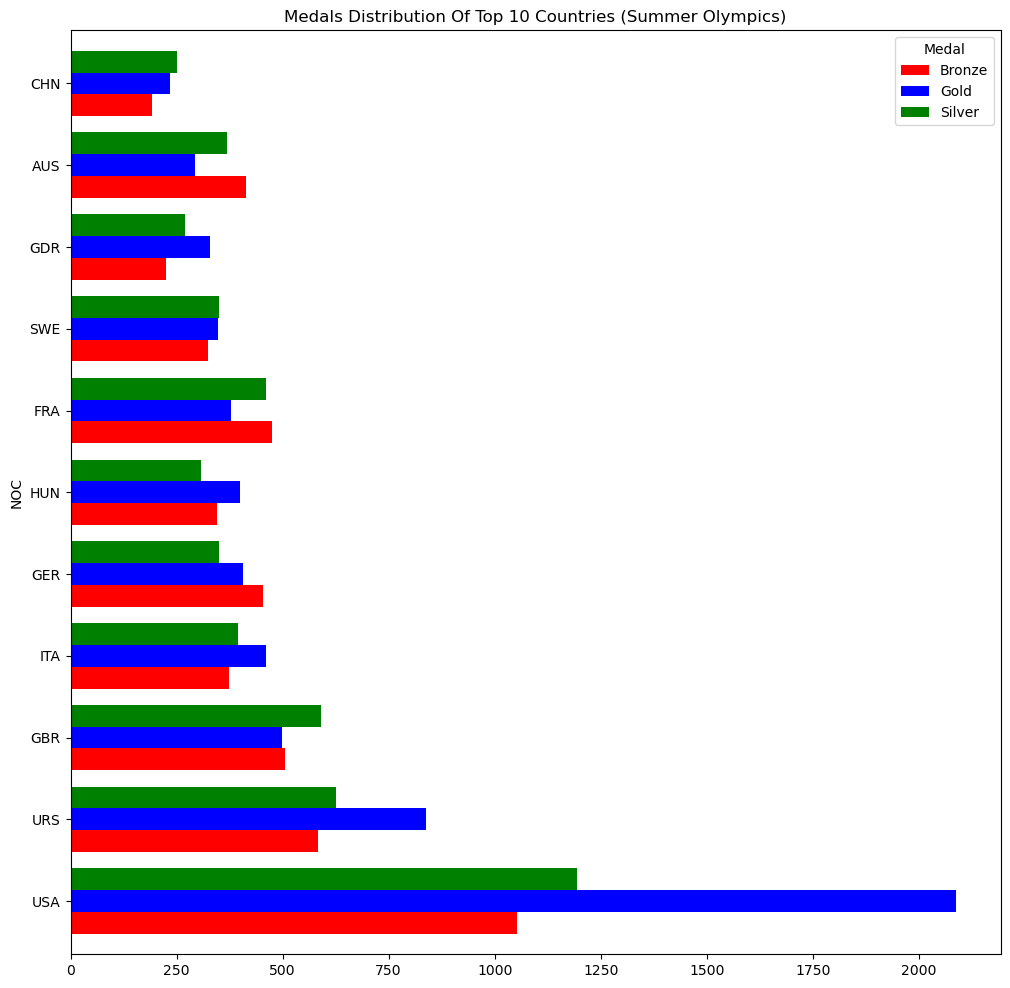

In [5]:
medals_country=d.groupby(['NOC','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('NOC','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['red', 'blue', 'green'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

#### Athelete with highest number of medals recived

In [6]:
print('The Highest Decorated Male Athlete is: ',d[d['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',d[d['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  PHELPS, Michael with:  16  medals


In [7]:

print('The Highest Decorated Female Athlete is: ',d[d['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',d[d['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Female Athlete is:  LATYNINA, Larisa with:  18  medals


#### Medals By Top 10 Countries in Top Sports

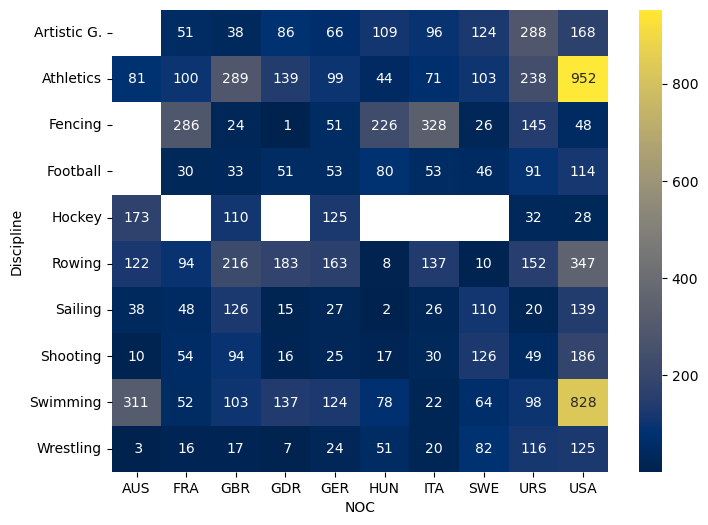

In [8]:
d.loc[d['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
d.loc[d['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'
test=d[d['NOC'].isin(d['NOC'].value_counts()[:10].index)]
test=test[test['Discipline'].isin(d['Discipline'].value_counts()[:10].index)]
test=test.groupby(['NOC','Discipline'])['Sport'].count().reset_index()
test=test.pivot('Discipline','NOC','Sport')
sns.heatmap(test,cmap='cividis',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()


#### Medals of Top Coiuntries by Year

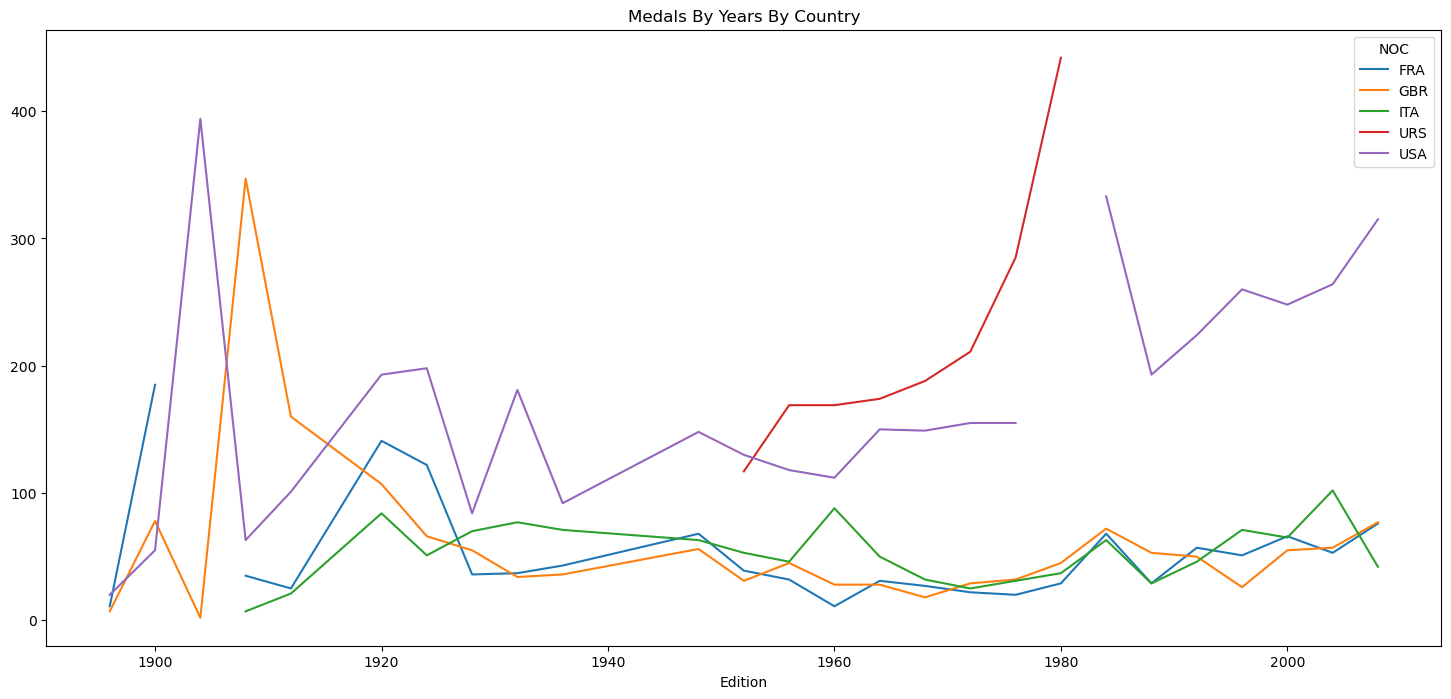

In [9]:
test1=d.groupby(['NOC','Edition'])['Medal'].count().reset_index()
test1=test1[test1['NOC'].isin(d['NOC'].value_counts()[:5].index)]
test1=test1.pivot('Edition','NOC','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()